# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    Optimize: period, sma, stop loss percent, margin.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Define Optimizations

In [4]:
# Pick one
optimize_period = True
optimize_sma    = False
optimize_pct    = False
optimize_margin = False

# Define high low trade periods ranges
if optimize_period:
    Xs = range(2, 15, 1)
    Xs = [str(X) for X in Xs]

# Define SMAs ranges
elif optimize_sma:
    Xs = range(20, 210, 10)
    Xs = [str(X) for X in Xs]

# Define stop loss percentage ranges
elif optimize_pct:
    Xs = range(5, 31, 1)
    Xs = [str(X) for X in Xs]

# Define margin ranges
elif optimize_margin:
    Xs = range(10, 41, 2)
    Xs = [str(X) for X in Xs]

In [5]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1.0,
    'period' : 7,
    'sma' : 200,
    'use_regime_filter' : True
}

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_period:
        options['period'] = int(X)
    elif optimize_sma:
        options['sma'] = int(X)
    elif optimize_pct:
         options['stop_loss_pct'] = int(X)/100
    elif optimize_margin:
        options['margin'] = int(X)/10
        
    strategies[X] = strategy.Strategy(symbol, capital, start, end, options) 
    strategies[X].run()

2 3 4 5 6 7 8 9 10 11 12 13 14 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'expected_shortfall',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14
annual_return_rate,3.69,5.27,6.39,6.18,6.99,7.21,6.61,6.24,6.04,6.56,6.17,5.69,4.99
max_closed_out_drawdown,-18.97,-16.99,-15.78,-14.04,-14.02,-14.63,-33.12,-32.97,-30.70,-30.81,-30.83,-30.72,-30.62
annualized_return_over_max_drawdown,0.19,0.31,0.40,0.44,0.50,0.49,0.20,0.19,0.20,0.21,0.20,0.19,0.16
drawdown_recovery_period,Not Recovered Yet,1126.00,521.00,497.00,395.00,583.00,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet
expected_shortfall,-5.00,-6.28,-6.60,-6.15,-6.89,-7.25,-14.66,-14.39,-12.98,-18.85,-17.85,-17.85,-17.85
best_month,8.75,12.09,11.04,10.05,10.05,12.88,17.14,17.02,17.23,17.33,18.78,18.68,18.59
worst_month,-13.74,-15.62,-15.29,-13.55,-13.53,-13.54,-31.37,-31.23,-30.70,-30.81,-30.83,-30.72,-30.62
sharpe_ratio,0.44,0.58,0.69,0.67,0.75,0.75,0.64,0.62,0.60,0.64,0.60,0.55,0.49
sortino_ratio,0.31,0.41,0.50,0.48,0.54,0.55,0.43,0.41,0.40,0.42,0.39,0.36,0.32
monthly_std,2.13,2.13,1.99,1.97,1.99,2.11,2.45,2.38,2.31,2.32,2.37,2.41,2.33


Bar graphs

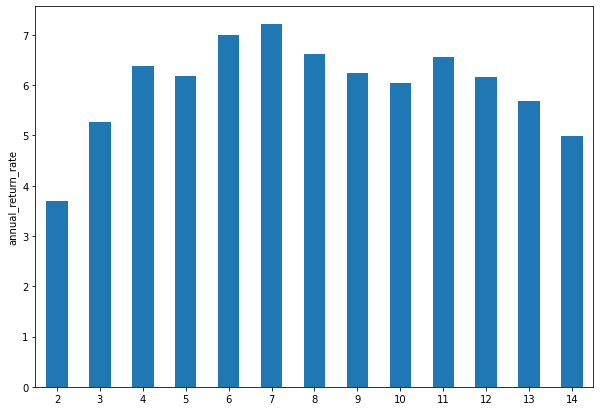

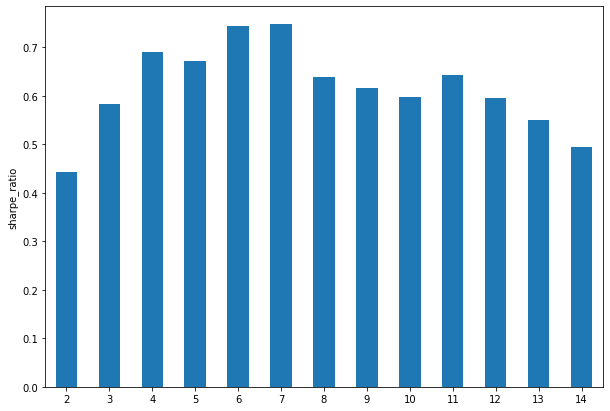

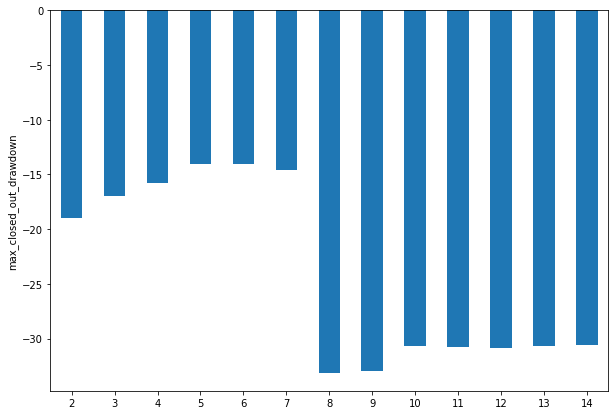

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Equity curve

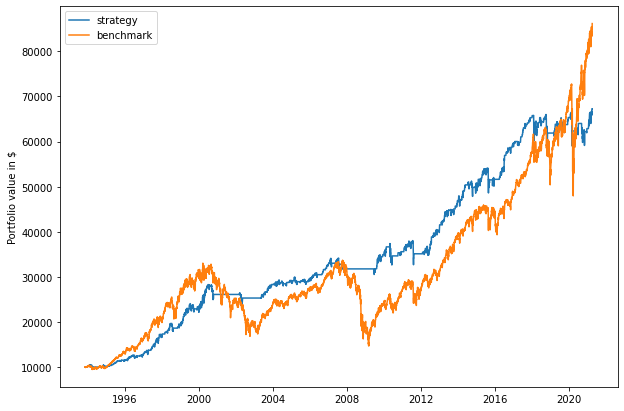

In [10]:
if   optimize_period: Y = '7'
elif optimize_sma:    Y = '70'
elif optimize_pct:    Y = '15'
elif optimize_margin: Y = '20'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)